# LAB 10 - NEURAL NETWORKS

This lab is comprise of 2 examples:

 - 1. Example MNIST 
     - A) Neural Network
     - B) Convolutional Neural Network
 - 2. CTR
 - 3. Poker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import random
import tensorflow as tf

# Example MNIST

## Preparing the Data

In [3]:
random.seed(88)
np.random.seed(88)
tf.random.set_seed(88)

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [7]:
pd.Series(y_test).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

The most dominant class is '1'. Therefore the baseline accuracy can be computed as:

In [8]:
print('baseline_acc =', 1135/len(y_test))

baseline_acc = 0.1135


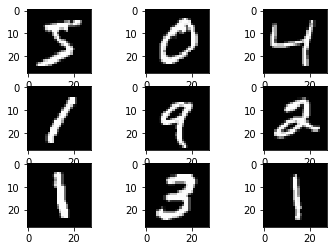

In [9]:
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    
plt.show()

Reshape the image data into length 28*28 = 784 feature vectors, then normalize

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train_reshaped = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_train_reshaped = X_train.reshape(-1, 28*28)
X_train_normalized = X_train_reshaped/255
X_train_normalized.shape

(60000, 28, 28, 1)

In [12]:
X_test_reshaped = X_test.reshape((X_test.shape[0], 28, 28, 1))
# X_test_reshaped = X_test.reshape(-1, 28*28)
X_test_normalized = X_test_reshaped/255
X_test_normalized.shape

(10000, 28, 28, 1)

### Convert labels to one-hot encoding

In [13]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Neural Network

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

## Defining the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(512, activation='relu')) #, input_shape=(28, 28, 1)))
model.add(Dense(10, activation='softmax'))

## Compiling the model
opt = RMSprop()
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model
model.fit(X_train_normalized,
          y_train_encoded,
          epochs=5,
          batch_size=128,
          validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 4s 9ms/step - loss: 0.2836 - accuracy: 0.9172 - val_loss: 0.1436 - val_accuracy: 0.9587
Epoch 2/5
375/375 [==============================] - 3s 9ms/step - loss: 0.1193 - accuracy: 0.9647 - val_loss: 0.1052 - val_accuracy: 0.9696
Epoch 3/5
375/375 [==============================] - 4s 10ms/step - loss: 0.0772 - accuracy: 0.9781 - val_loss: 0.0970 - val_accuracy: 0.9716
Epoch 4/5
375/375 [==============================] - 4s 10ms/step - loss: 0.0549 - accuracy: 0.9837 - val_loss: 0.0848 - val_accuracy: 0.9737
Epoch 5/5
375/375 [==============================] - 3s 9ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.0762 - val_accuracy: 0.9780


In [31]:
loss, acc = model.evaluate(X_test_normalized, y_test_encoded)
print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9804
0.980400025844574


## Convolutional Neural Network

In [32]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [33]:
opt = RMSprop()
model2.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.fit(X_train_normalized,
           y_train_encoded,
           epochs=5,
           batch_size=64,
           validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 66s 88ms/step - loss: 0.2110 - accuracy: 0.9338 - val_loss: 0.0572 - val_accuracy: 0.9835
Epoch 2/5
750/750 [==============================] - 35s 47ms/step - loss: 0.0537 - accuracy: 0.9835 - val_loss: 0.0471 - val_accuracy: 0.9859
Epoch 3/5
750/750 [==============================] - 47s 62ms/step - loss: 0.0368 - accuracy: 0.9885 - val_loss: 0.0534 - val_accuracy: 0.9844
Epoch 4/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0455 - val_accuracy: 0.9865
Epoch 5/5
750/750 [==============================] - 29s 39ms/step - loss: 0.0221 - accuracy: 0.9934 - val_loss: 0.0365 - val_accuracy: 0.9902


In [34]:
loss, acc = model2.evaluate(X_test_normalized, y_test_encoded)
print(acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0265 - accuracy: 0.9918
0.9918000102043152


# Poker

In [39]:
poker = pd.read_csv('train.csv')

# pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_columns', 200)
poker.info()
poker.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  hand    25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [89]:
poker_encoded = pd.get_dummies(poker, dtype=float)
poker_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  hand    25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [40]:
train_encoded = poker_encoded.sample(frac=0.7, random_state=88)
test_encoded = poker_encoded.drop(train_encoded.index)

print(poker_encoded.shape)
print(train_encoded.shape)
print(test_encoded.shape)

In [49]:
# Baseline
pd.Series(train_encoded['hand']).value_counts()

0    8731
1    7409
2     854
3     376
4      65
5      35
6      25
9       5
7       4
8       3
Name: hand, dtype: int64

In [48]:
pd.Series(test_encoded['hand']).value_counts()

0    3762
1    3190
2     352
3     137
4      28
5      19
6      11
7       2
8       2
Name: hand, dtype: int64

The most dominant class is '0', the baseline accuracy would predict that

In [50]:
print('baseline_acc =', 3762/len(test_encoded['hand']))

baseline_acc = 0.5013994402239105


## Linear Discriminant Analysis

In [67]:
y_train_encoded = train_encoded['hand']
X_train_encoded = train_encoded.drop(columns=['hand'])

y_test_encoded = test_encoded['hand']
X_test_encoded = test_encoded.drop(columns=['hand'])

In [91]:
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')
# X_train_encoded = enc.fit_transform(X_train_encoded.reshape(-1, 1))
# X_train_encoded.toarray()

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_encoded, y_train_encoded)

y_prob_lda = lda.predict_proba(X_test_encoded)
# y_pred_lda = pd.Series([1 if x > 1/2 else 0 for x in y_prob_lda[:,1]], index=y_test_encoded.index)
y_pred_lda = lda.predict(X_test_encoded)

print ("\nAccuracy:", accuracy_score(y_test_encoded, y_pred_lda))


Accuracy: 0.5013994402239105


## Random Forests

In [98]:
from sklearn.ensemble import RandomForestClassifier
import time

tic = time.time()

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators = 500, random_state=88)
rf.fit(X_train_encoded, y_train_encoded)

toc = time.time()
print('Random Forest time:', round(toc-tic, 2),'s')

time: 12.71 s


In [99]:
y_pred_rf = rf.predict(X_test_encoded)

print ("\nAccuracy:", accuracy_score(y_test_encoded, y_pred_rf))


Accuracy: 0.6229508196721312


## Neural Networks

In [ ]:
# Load keras
# If you need to install keras need one of backend engines: TensorFlow, Theano, or CNTK
# To install keras, run these code:
# install.packages("keras")
# library(keras)
# install_keras()

# Useful reference: https://keras.rstudio.com

library(keras)
use_session_with_seed(564) # Use A Session With A Random Seed

# Prep for Keras
trainX <- model.matrix(hand ~ . , data = train.poker)
trainX = trainX[,2:76]
trainY <- model.matrix(~ hand -1, data = train.poker)

testX <- model.matrix(hand ~ . , data = test.poker)
testX = testX[,2:76]
testY <- model.matrix(~ hand -1, data = test.poker)

### Single Hidden Layer Model Sigmoid

Sequential models are created using the `Sequential()` function and are composed of a set of linear layers.

Add A Densely-Connected NN Layer To An Output using `Dense()`

It has arguments object: model, units: number of units, input_shape: Dimensionality of the input, activation: choose activation function



In [107]:
from keras.models import Sequential
from keras.models import Input
from keras.layers import Dense

## Defining the model
nn_mod_1 = Sequential()
nn_mod_1.add(Input(shape=(75,)))
nn_mod_1.add(Dense(100, activation='sigmoid')) #, input_shape=(75)))
nn_mod_1.add(Dense(10, activation='softmax'))

# nn_mod_1 <- keras_model_sequential() 
# nn_mod_1 %>%
#   layer_dense(units = 100, activation = "sigmoid", input_shape = c(75)) %>% # Adding the hidden layer
#   layer_dense(units = 10, activation = "softmax") # adding the output layer
# summary(nn_mod_1)

Before training a model, we need to configure the learning process, which is done via the compile() function.
It receives three arguments:
1. An optimizer. 
This could be the string identifier of an existing optimizer (e.g. as “rmsprop” or “adagrad”) or a call to an optimizer function (e.g. optimizer_sgd()).
2. A loss function. 
This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (e.g. “categorical_crossentropy” or “mse”) or a call to a loss function (e.g. loss_mean_squared_error()).
3. A list of metrics. 
For any classification problem you will want to set this to metrics = c('accuracy'). A metric could be the string identifier of an existing metric or a call to metric function (e.g. metric_binary_crossentropy()).

rmsprop is basiclly : Divide the gradient by a running average of its recent magnitude. You can google it to get more information.
Consider it as a sophisticated way to get gradient in gradient descent.

In [109]:
## Compiling the model
opt = RMSprop()
nn_mod_1.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [111]:
## Training the model 

tic = time.time()

model2.fit(X_train_encoded,
           y_train_encoded,
           epochs=100,
           validation_split=0.2)

toc = time.time()
print('Neural Net 1 time:', round(toc-tic, 2),'s')

Epoch 1/100


ValueError: in user code:

    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_16 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 10]


In [113]:
## Evaluating the model
loss, acc = nn_mod_1.evaluate(X_test_encoded, y_test_encoded)
print(acc)

ValueError: in user code:

    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1224 test_function  *
        return step_function(self, iterator)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1208 run_step  **
        outputs = model.test_step(data)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1174 test_step
        y_pred = self(x, training=False)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Users/stefanozavagli/anaconda3/envs/ee127/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_22 is incompatible with the layer: expected axis -1 of input shape to have value 75 but received input with shape [None, 10]


In [ ]:
# Single hidden layer model ReLU
# Switching sigmoid to ReLU max(0,a)

nn_mod_2 <- keras_model_sequential() 
nn_mod_2 %>%
  layer_dense(units = 100, activation = "relu", input_shape = c(75)) %>%
  layer_dense(units = 10, activation = "softmax")
summary(nn_mod_2)

nn_mod_2 %>% compile(
  optimizer = "rmsprop",
  loss = "categorical_crossentropy",
  metrics = c("accuracy")
)

tic("Neural Net 2:")
training_history <- nn_mod_2 %>% 
  fit(trainX, trainY, 
      epochs = 100, validation_split = 0.2)
toc()

# evaluate
nn_mod_2 %>% evaluate(testX, testY)

# Is it better than sigmoid?


# Three hidden layer model ReLU
nn_mod_3 <- keras_model_sequential() 
nn_mod_3 %>%
  layer_dense(units = 75, activation = "relu", input_shape = c(75)) %>%
  layer_dense(units = 50, activation = "relu") %>%
  layer_dense(units = 25, activation = "relu") %>%
  layer_dense(units = 10, activation = "softmax")
summary(nn_mod_3)

nn_mod_3 %>% compile(
  optimizer = "rmsprop",
  loss = "categorical_crossentropy",
  metrics = c("accuracy")
)

tic("Neural Net 3:")
training_history <- nn_mod_3 %>% 
  fit(trainX, trainY, 
      epochs = 100, validation_split = 0.2)
toc()

# evaluate
nn_mod_3 %>% evaluate(testX, testY)




# CTR

# EXTRA

In [ ]:
# from sklearn import preprocessing

# lb = preprocessing.LabelBinarizer()
# y_train_encoded = lb.fit_transform(y_train)
# y_train_encoded


# from sklearn import preprocessing

# le = preprocessing.LabelEncoder()
# y_train_encoded = le.fit_transform(y_train)
# y_train_encoded


# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')
# y_train_encoded = enc.fit_transform(y_train.reshape(-1, 1))
# y_train_encoded.toarray()